# Вариант 1
## Земсков

<div><img src="./Земсков.png" width="450"/></div>

In [1]:
import numpy as np
#Функция для создания синусоиды
def rounding(n):
    return round(round(n,3)+0.001,3) if (round(n,3)*1000)%2!=0 else round(n,3)

def sinys(t,amplisuda,L):
    return amplisuda*np.sin(np.pi*t/L)

def solve(k,c,m1,m2,m3,m4,m5,h1,h2,l1,l2,I1,L,v,A,delta_t=0.002,gamma = 0.5,betta = 0.25):
    #Создаем матрицу коэффициентов упругости
    v = v*1000/3600
    T = round((l1+l2+L)/v,2)
    T = [round(i,3) for i in np.arange(0,(T+0.001),delta_t)]
    N = len(T)
    t_matrix = list(map(rounding,[(l2-l2)/v,(l2+l1)/v]))
    n_it1t = int((L/v)/delta_t)
    sinus = np.array([sinys(r,A,L) for r in np.linspace(0,1,n_it1t)])
    K_diag = np.diag(k)
    D = np.array([[-1,h1,1,0,0,0],
    [-1,-h2,0,1,0,0],
    [1,-l1,0,0,-1,0],
    [1,l2,0,0,0,-1],
    [0,0,0,0,1,0],
    [0,0,0,0,0,1]])
    K = np.transpose(D)@K_diag@D
    #Создаем матрицу коэффициентов демпфирования
    C_diag = np.diag(c)
    C = np.array([[0,0,0,0,0,0],
    [0,0,0,0,0,0],
    [1,-l1,0,0,-1,0],
    [1,l2,0,0,0,-1],
    [0,0,0,0,1,0],
    [0,0,0,0,0,1]])
    C = np.transpose(C)@C_diag@C
    #Создаем диагональную матрицу масс и моментов
    M = np.diag([m1,I1,m2,m3,m4,m5])
    #Делаем матрицу внешних воздействий
    n = D.shape[0]-len(t_matrix)+1
    y_voz = np.zeros((D.shape[0]+1,N))
    y_voz[0,:] = T
    index_t = [np.where(y_voz[0,:] == i)[-1][-1] for i in t_matrix]
    for i in index_t:
        y_voz[n,i:] =  np.concatenate([sinus,np.zeros((N-n_it1t-i))])
        n+=1
    y_impact = y_voz[1:,:]
    #Создаем обратную матрицу
    M_reverse = np.linalg.inv(M+delta_t*gamma*C+delta_t**2*betta*K)
    #Создадим оператор для ввода вектора внешних сил
    K_diag_transpose = np.transpose(D)@K_diag
    #Зададим вектора перемещения скорости и ускорения в 0 момент
    X = np.zeros((K_diag_transpose.shape[0],1))
    X_t = np.zeros((K_diag_transpose.shape[0],1))
    X_tt = np.zeros((K_diag_transpose.shape[0],1))
    for i in range(N-1):
        #Формируем матрицы методом Ньюмарка
        #Ускорений
        F = K_diag_transpose@y_impact[:,i+1]-C@(X_t[:,-1]+delta_t*(1-gamma)*X_tt[:,-1])-K@(X[:,-1]+delta_t*X_t[:,-1]+1/2*delta_t**2*(1-2*betta)*X_tt[:,-1])
        X_tt = np.concatenate([X_tt,(np.dot(F,M_reverse)).reshape(-1,1)],axis =1)
        #Скоростей
        X_tn = X_t[:,i]+delta_t*(gamma*X_tt[:,-1]+(1-gamma)*X_tt[:,i])
        X_t = np.concatenate([X_t,X_tn.reshape(-1,1)],axis =1)
        #Перемещений
        X_n = X[:,i]+delta_t*X_t[:,i]+0.5*(delta_t**2)*(2*betta*X_tt[:,-1]+(1-2*betta)*X_tt[:,i])
        X = np.concatenate([X,X_n.reshape(-1,1)],axis =1)
    return X,X_t,X_tt

In [2]:
X,X_t,X_tt = solve([2*10**8,3*10**8,3*10**6,4*10**6,10**6,10**6],[0,0,3*10**4,3*10**4,2*10**4,2*10**4],14600,5200,4300,1100,1200,9.4,11.5,10.5,12,560000,1.8,40,0.45)

,0,1,2,3,4,5,6,7,8,9,...,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095
0,0.0,1.900969e-08,1.526924e-07,6.310409e-07,1.832136e-06,4.263187e-06,8.526423e-06,0.000015,0.000025,0.000039,...,0.039263,0.040391,0.041561,0.042773,0.044026,0.045319,0.046651,0.048021,0.049428,0.050868
1,0.0,-4.780830e-09,-3.708488e-08,-1.464782e-07,-4.029362e-07,-8.839412e-07,-1.666316e-06,-0.000003,-0.000004,-0.000007,...,0.009156,0.009541,0.009930,0.010322,0.010718,0.011117,0.011519,0.011924,0.012331,0.012740
2,0.0,2.368500e-09,2.768942e-08,1.627773e-07,6.491908e-07,1.995711e-06,5.081903e-06,0.000011,0.000022,0.000040,...,-0.046821,-0.049316,-0.051807,-0.054294,-0.056774,-0.059246,-0.061707,-0.064156,-0.066590,-0.069007
3,0.0,-2.345860e-09,-2.662694e-08,-1.507225e-07,-5.734772e-07,-1.665685e-06,-3.969591e-06,-0.000008,-0.000015,-0.000025,...,0.144241,0.149805,0.155454,0.161187,0.166999,0.172890,0.178855,0.184893,0.191001,0.197173
4,0.0,8.508650e-06,5.020051e-05,1.556758e-04,3.520279e-04,6.627810e-04,1.107879e-03,0.001704,0.002463,0.003396,...,-0.039344,-0.041595,-0.043847,-0.046100,-0.048351,-0.050600,-0.052845,-0.055086,-0.057320,-0.059548
5,0.0,-1.039242e-09,-1.014324e-08,-4.995297e-08,-1.682794e-07,-4.421691e-07,-9.761373e-07,-0.000002,-0.000003,-0.000006,...,0.200061,0.204892,0.209757,0.214652,0.219575,0.224522,0.229490,0.234476,0.239125,0.242764


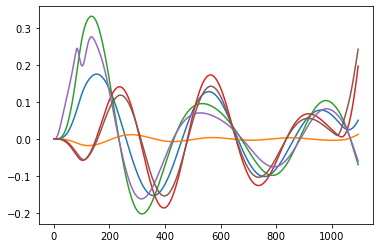

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

for i in range(len(X)):
    plt.plot(X[i])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095
0,0.0,0.000019,0.000115,0.000364,0.000837,0.001594,0.002670,0.004081,0.005829,0.007915,...,0.553419,0.574519,0.595488,0.616201,0.636537,0.656407,0.675779,0.694679,0.712416,0.727610
1,0.0,-0.000005,-0.000028,-0.000082,-0.000175,-0.000306,-0.000476,-0.000684,-0.000937,-0.001246,...,0.191419,0.193378,0.195244,0.197023,0.198710,0.200301,0.201791,0.203177,0.204225,0.204531
2,0.0,0.000002,0.000023,0.000112,0.000374,0.000972,0.002114,0.004027,0.006928,0.011004,...,-1.248278,-1.246803,-1.244772,-1.241984,-1.238264,-1.233501,-1.227672,-1.220845,-1.213105,-1.204341
3,0.0,-0.000002,-0.000022,-0.000102,-0.000321,-0.000772,-0.001532,-0.002632,-0.004045,-0.005713,...,2.760021,2.803644,2.845811,2.886588,2.926064,2.964300,3.001271,3.036857,3.070642,3.101191
4,0.0,0.008509,0.033183,0.072292,0.124060,0.186693,0.258404,0.337436,0.422083,0.510717,...,-1.124932,-1.125903,-1.126267,-1.126019,-1.125163,-1.123706,-1.121658,-1.119031,-1.115782,-1.111735
5,0.0,-0.000001,-0.000008,-0.000032,-0.000087,-0.000187,-0.000347,-0.000576,-0.000888,-0.001300,...,2.406243,2.424257,2.440528,2.455086,2.467964,2.479194,2.488808,2.496835,2.151537,1.487812


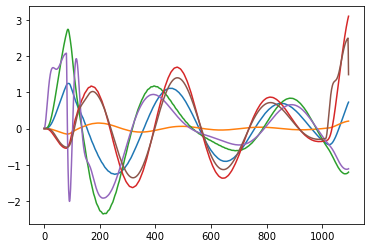

In [4]:
for i in range(len(X)):
    plt.plot(X_t[i])
pd.DataFrame(X_t)

,0,1,2,3,4,5,6,7,8,9,...,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095
0,0.0,0.019010,0.076654,0.172349,0.301396,0.454815,0.621159,0.790304,0.957802,1.127664,...,10.568340,10.531701,10.436966,10.276521,10.059607,9.810408,9.560752,9.339812,8.397017,6.796699
1,0.0,-0.004781,-0.017962,-0.036385,-0.056332,-0.075497,-0.094043,-0.114224,-0.138884,-0.169763,...,1.002576,0.955681,0.911252,0.866816,0.820321,0.771039,0.719406,0.666072,0.382206,-0.076587
2,0.0,0.002368,0.018215,0.070968,0.191175,0.406789,0.734919,1.177831,1.723899,2.352132,...,0.623466,0.851552,1.179850,1.608138,2.112136,2.650938,3.177460,3.649472,4.090455,4.673738
3,0.0,-0.002346,-0.017243,-0.062982,-0.155453,-0.295566,-0.465113,-0.634457,-0.778263,-0.890346,...,22.179828,21.442814,20.724526,20.051992,19.424556,18.810857,18.160538,17.425612,16.359585,14.188907
4,0.0,8.508650,16.165907,22.943005,28.824803,33.808432,37.902848,41.128793,43.518515,45.114782,...,-0.635621,-0.334952,-0.029230,0.276891,0.579785,0.877450,1.169624,1.457673,1.791152,2.256158
5,0.0,-0.001039,-0.005986,-0.017694,-0.037142,-0.063585,-0.095767,-0.133470,-0.178433,-0.234104,...,9.446407,8.567703,7.703032,6.854880,6.023325,5.207321,4.406222,3.620683,-348.918714,-314.805632


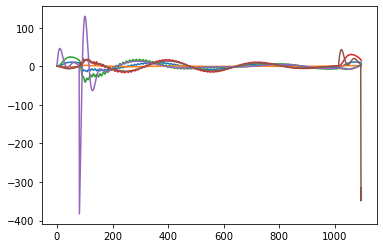

In [5]:
for i in range(len(X)):
    plt.plot(X_tt[i])
pd.DataFrame(X_tt)